<a href="https://colab.research.google.com/github/RishabPanyam96/Manu_Analysis/blob/main/Manu_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
players_df=pd.read_csv('/content/drive/My Drive/players.csv',index_col=0) 

In [5]:
players_df =players_df.drop_duplicates()

In [6]:
matches_df = pd.read_csv('/content/drive/My Drive/matches.csv',index_col=0)

In [7]:
matches_df.datetime = pd.to_datetime(matches_df.datetime)

In [8]:
def manager(date):
  if date < dt.date(2016,5,23) :
    return 'Louis Van Gaal'
  elif date < dt.date(2018,12,18):
    return 'Jose Mourinho'
  else:
    return 'Ole Gunnar Solskjaer'    

In [9]:
def season(date):
  if date < dt.date(2015,5,25) :
    return '2014-2015'
  elif date < dt.date(2016,5,18):
    return '2015-2016'
  elif date < dt.date(2017,5,22):
    return '2016-2017'
  elif date < dt.date(2018,5,14):
    return '2017-2018'
  elif date < dt.date(2019,5,13):
    return '2018-2019'
  else:
    return '2019-2020'          

In [10]:
matches_df['manager'] = matches_df.datetime.apply(lambda x : manager(x))

In [11]:
matches_df['Season'] = matches_df.datetime.apply(lambda x : season(x))

In [12]:
matches_df.datetime.dt.year.value_counts()

2019    58
2017    40
2016    38
2015    38
2018    37
2020    36
2014    19
Name: datetime, dtype: int64

In [13]:
matches_df.shape

(266, 16)

In [14]:
players_df.head()

,assists,goals,h_a,id,key_passes,own_goals,player,player_id,position,positionOrder,red_card,roster_in,roster_out,shots,team_id,time,xA,xG,xGBuildup,xGChain,yellow_card,match_id,team_name
0,0,0,h,17133,0,0,David de Gea,546,GK,1,0,0,0,0,89,90,0.000000,0.000000,0.000000,0.000000,0,4749,Manchester United
1,0,0,h,17136,0,0,Chris Smalling,628,DC,3,0,0,0,1,89,90,0.000000,0.103211,0.071270,0.174481,0,4749,Manchester United
2,0,0,h,17134,1,0,Phil Jones,951,DC,3,0,0,0,1,89,90,0.052529,0.069479,0.149839,0.149839,0,4749,Manchester United
3,0,0,h,17135,0,0,Tyler Blackett,4463,DC,3,0,0,0,0,89,90,0.000000,0.000000,0.074857,0.074857,1,4749,Manchester United
4,0,0,h,17137,0,0,Jesse Lingard,558,MR,8,0,17145,0,0,89,23,0.000000,0.000000,0.018741,0.018741,0,4749,Manchester United


In [15]:
#manu_fixtures.columns= ['Date','League','Home','Away','Score']

In [16]:
#manu_fixtures.Date = pd.to_datetime(manu_fixtures.Date,format='%d/%m/%y')

In [17]:
#manu_fixtures= manu_fixtures.drop(columns=['Home','Away','Score'])

In [18]:
#manu_fixtures['year'] = manu_fixtures.Date.dt.year
#manu_fixtures['month'] = manu_fixtures.Date.dt.month
#manu_fixtures['day']= manu_fixtures.Date.dt.day

In [19]:
#matches_df['year'] = matches_df.datetime.dt.year
#matches_df['month'] = matches_df.datetime.dt.month
#matches_df['day'] = matches_df.datetime.dt.day

In [20]:
#matches_df = pd.merge(matches_df,manu_fixtures,on=['year','month','day'],how= 'left')

In [21]:
#matches_df.League.value_counts()

In [22]:
matches_df.head()

,datetime,forecast_d,forecast_l,forecast_w,id,isResult,result,side,opp,XG_team,XG_opp,Goals_scored,Goals_conceded,opp_id,manager,Season
0,2014-08-16 12:45:00,0.318817,0.087950,0.593233,4749,True,l,h,Swansea,1.166350,0.278076,1,2,84,Louis Van Gaal,2014-2015
1,2014-08-24 16:00:00,0.347109,0.404688,0.248203,4767,True,d,a,Sunderland,0.941557,0.666489,1,1,77,Louis Van Gaal,2014-2015
2,2014-08-30 12:45:00,0.470480,0.249019,0.280501,4769,True,d,a,Burnley,0.467281,0.513746,0,0,92,Louis Van Gaal,2014-2015
3,2014-09-14 16:00:00,0.168136,0.079826,0.752038,4727,True,w,h,Queens Park Rangers,2.209110,0.563524,4,0,202,Louis Van Gaal,2014-2015
4,2014-09-21 13:30:00,0.186411,0.254403,0.559186,4736,True,l,a,Leicester,1.711910,2.542200,3,5,75,Louis Van Gaal,2014-2015


In [23]:
matches_df = matches_df.drop_duplicates(subset= ['datetime'])

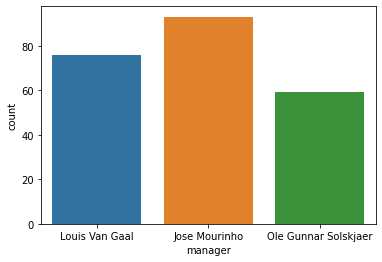

In [24]:
sns.countplot(x='manager',data=matches_df)

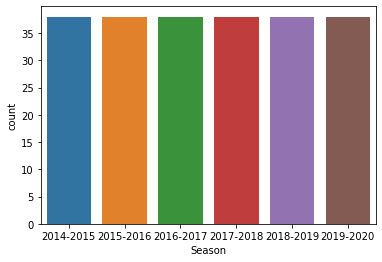

In [25]:
sns.countplot(x='Season',data=matches_df)

In [26]:
def expected_result(Xgteam,Xgopp):
  XGR = Xgteam - Xgopp
  if XGR > 0.5:
    return 'Win'
  elif XGR < -0.5 :
    return 'Loss'
  else :
    return 'Draw'   

In [27]:
matches_df['Expected_result'] = matches_df.apply(lambda x : expected_result(x.XG_team,x.XG_opp),axis=1)

In [28]:
matches_df['team_XG_diff'] = matches_df['Goals_scored'] - matches_df['XG_team']

In [29]:
matches_df['opp_XG_diff'] = matches_df['Goals_conceded'] - matches_df['XG_opp']

In [30]:
players_df.team_id

0     89
1     89
2     89
3     89
4     89
      ..
26    89
27    89
28    89
29    89
30    89
Name: team_id, Length: 6318, dtype: int64

In [31]:
matches_df.head()

,datetime,forecast_d,forecast_l,forecast_w,id,isResult,result,side,opp,XG_team,XG_opp,Goals_scored,Goals_conceded,opp_id,manager,Season,Expected_result,team_XG_diff,opp_XG_diff
0,2014-08-16 12:45:00,0.318817,0.087950,0.593233,4749,True,l,h,Swansea,1.166350,0.278076,1,2,84,Louis Van Gaal,2014-2015,Win,-0.166350,1.721924
1,2014-08-24 16:00:00,0.347109,0.404688,0.248203,4767,True,d,a,Sunderland,0.941557,0.666489,1,1,77,Louis Van Gaal,2014-2015,Draw,0.058443,0.333511
2,2014-08-30 12:45:00,0.470480,0.249019,0.280501,4769,True,d,a,Burnley,0.467281,0.513746,0,0,92,Louis Van Gaal,2014-2015,Draw,-0.467281,-0.513746
3,2014-09-14 16:00:00,0.168136,0.079826,0.752038,4727,True,w,h,Queens Park Rangers,2.209110,0.563524,4,0,202,Louis Van Gaal,2014-2015,Win,1.790890,-0.563524
4,2014-09-21 13:30:00,0.186411,0.254403,0.559186,4736,True,l,a,Leicester,1.711910,2.542200,3,5,75,Louis Van Gaal,2014-2015,Loss,1.288090,2.457800


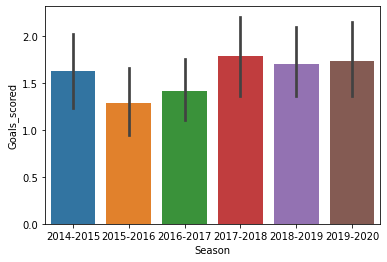

In [32]:
sns.barplot(x='Season',y='Goals_scored',data= matches_df)

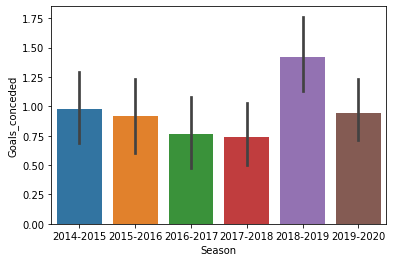

In [33]:
sns.barplot(x='Season',y='Goals_conceded',data= matches_df)

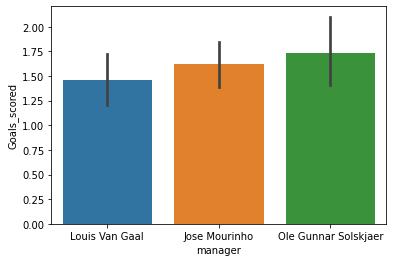

In [34]:
sns.barplot(x='manager',y='Goals_scored',data= matches_df)

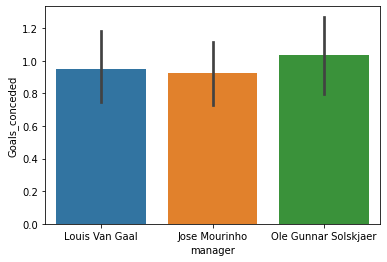

In [35]:
sns.barplot(x='manager',y='Goals_conceded',data= matches_df)

In [36]:
pd.crosstab(index=matches_df['result'],columns=matches_df['Expected_result'],normalize= True,)

Expected_result,Draw,Loss,Win
result,,,
d,0.114035,0.048246,0.105263
l,0.092105,0.083333,0.035088
w,0.153509,0.039474,0.328947


In [37]:
soljskaer_df = matches_df[matches_df['manager'] =='Ole Gunnar Solskjaer']

In [38]:
mouriniho_df = matches_df[matches_df['manager'] =='Jose Mourinho']

In [39]:
VanGaal_df = matches_df[matches_df['manager'] =='Louis Van Gaal']

In [40]:
pd.crosstab(index=soljskaer_df['result'],columns=soljskaer_df['Expected_result'],normalize= True)

Expected_result,Draw,Loss,Win
result,,,
d,0.101695,0.050847,0.118644
l,0.084746,0.067797,0.067797
w,0.101695,0.016949,0.389831


In [41]:
pd.crosstab(index=mouriniho_df['result'],columns=mouriniho_df['Expected_result'],normalize= True)

Expected_result,Draw,Loss,Win
result,,,
d,0.096774,0.053763,0.129032
l,0.086022,0.086022,0.010753
w,0.182796,0.021505,0.333333


In [42]:
pd.crosstab(index=VanGaal_df['result'],columns=VanGaal_df['Expected_result'],normalize= True)

Expected_result,Draw,Loss,Win
result,,,
d,0.144737,0.039474,0.065789
l,0.105263,0.092105,0.039474
w,0.157895,0.078947,0.276316


In [43]:
pd.crosstab(matches_df.result,[matches_df.manager,matches_df.Expected_result])

manager         Jose Mourinho           ... Ole Gunnar Solskjaer         
Expected_result          Draw Loss Win  ...                 Draw Loss Win
result                                  ...                              
d                           9    5  12  ...                    6    3   7
l                           8    8   1  ...                    5    4   4
w                          17    2  31  ...                    6    1  23

[3 rows x 9 columns]

In [44]:
def points(result):
    point_actual =0 
    if result == 'w':
      point_actual = 3
    elif result == 'd':
      point_actual = 1
    return(point_actual)  

In [45]:
matches_df['point'] = matches_df['result'].apply(lambda x: points(x))

In [46]:
def Expected_point_diff(actual,expected):
    point_actual = 0
    point_expected = 0 
    if actual == 'w':
      point_actual = 3
    elif actual =='d':
      point_actual = 1
    if expected == 'Win':
       point_expected = 3
    elif expected == 'Draw':
       point_expected = 1
    return(point_actual - point_expected)        

In [47]:
matches_df['Actual_vs_Expected_point_diff'] = matches_df.apply(lambda x : Expected_point_diff(x['result'],x['Expected_result']),axis=1)

In [48]:
matches_df['Actual_vs_Expected_goals_scored_diff'] = matches_df.Goals_scored - matches_df.XG_team

In [49]:
matches_df['Actual_vs_Expected_goals_conceded_diff'] = matches_df.Goals_conceded - matches_df.XG_opp

In [50]:
matches_df['Goal_difference'] = matches_df['Goals_scored'] - matches_df['Goals_conceded']

In [51]:
df_top6 = pd.DataFrame(np.array([['2014-2015',['Chelsea','Manchester City','Arsenal','Manchester United','Tottenham','Liverpool']],
           ['2015-2016',['Leicester','Arsenal','Manchester City','Manchester United','Tottenham','Southampton']],
            ['2016-2017',['Liverpool','Arsenal','Manchester City','Manchester United','Tottenham','Chelsea']],
             ['2017-2018',['Liverpool','Arsenal','Manchester City','Manchester United','Tottenham','Chelsea']],
              ['2018-2019',['Liverpool','Arsenal','Manchester City','Manchester United','Tottenham','Chelsea']],
               ['2019-2020',['Liverpool','Leicester','Manchester City','Manchester United','Tottenham','Chelsea']]]),columns=['season','top6'])

In [52]:
def is_top6(team,season,df_top6) :
    list_check = df_top6[df_top6['season'] == season]['top6'].item()
    if team in list_check:
      return 'Yes'
    else :
      return 'No'  


In [53]:
matches_df['is_top6']= matches_df.apply(lambda x : is_top6(x['opp'],x['Season'],df_top6),axis=1)

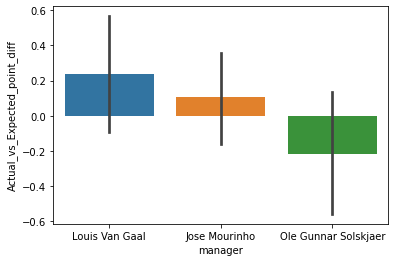

In [54]:
sns.barplot(x='manager',y='Actual_vs_Expected_point_diff',data =matches_df)

In [55]:
matches_df.groupby('manager').agg({'Actual_vs_Expected_point_diff':['sum','mean']})

Actual_vs_Expected_point_diff          
                                               sum      mean
manager                                                     
Jose Mourinho                                   10  0.107527
Louis Van Gaal                                  18  0.236842
Ole Gunnar Solskjaer                           -13 -0.220339

In [56]:
matches_df.groupby(['manager','Season']).agg({'Actual_vs_Expected_point_diff':['sum','mean']})

Actual_vs_Expected_point_diff          
                                                         sum      mean
manager              Season                                           
Jose Mourinho        2016-2017                           -11 -0.289474
                     2017-2018                            19  0.500000
                     2018-2019                             2  0.117647
Louis Van Gaal       2014-2015                             5  0.131579
                     2015-2016                            13  0.342105
Ole Gunnar Solskjaer 2018-2019                             2  0.095238
                     2019-2020                           -15 -0.394737

In [57]:
,'Actual_vs_Expected_goals_scored_diff':['sum','mean'] ,'Actual_vs_Expected_goals_conceded_diff':['sum','mean']

("'Actual_vs_Expected_goals_scored_diff':['sum','mean']",
 ",'Actual_vs_Expected_goals_conceded_diff':['sum','mean']")

In [58]:
matches_df.groupby(['manager','Season']).agg({'Actual_vs_Expected_goals_scored_diff':['sum','mean'] })

Actual_vs_Expected_goals_scored_diff          
                                                                sum      mean
manager              Season                                                  
Jose Mourinho        2016-2017                            -3.571359 -0.093983
                     2017-2018                             8.956588  0.235700
                     2018-2019                             0.781429  0.045966
Louis Van Gaal       2014-2015                             7.793140  0.205083
                     2015-2016                             3.575789  0.094100
Ole Gunnar Solskjaer 2018-2019                            -4.398927 -0.209473
                     2019-2020                            -0.186663 -0.004912

In [59]:
matches_df.groupby(['manager','Season']).agg({'Actual_vs_Expected_goals_conceded_diff':['sum','mean'] })

Actual_vs_Expected_goals_conceded_diff          
                                                                  sum      mean
manager              Season                                                    
Jose Mourinho        2016-2017                              -2.623915 -0.069050
                     2017-2018                             -15.540152 -0.408951
                     2018-2019                               2.474816  0.145577
Louis Van Gaal       2014-2015                              -2.842347 -0.074799
                     2015-2016                              -4.655822 -0.122522
Ole Gunnar Solskjaer 2018-2019                              -0.775006 -0.036905
                     2019-2020                              -2.059164 -0.054189

In [60]:
players_df_full = pd.merge(left = matches_df,right =players_df,how='inner',left_on='id',right_on='match_id')

In [61]:
players_df

,assists,goals,h_a,id,key_passes,own_goals,player,player_id,position,positionOrder,red_card,roster_in,roster_out,shots,team_id,time,xA,xG,xGBuildup,xGChain,yellow_card,match_id,team_name
0,0,0,h,17133,0,0,David de Gea,546,GK,1,0,0,0,0,89,90,0.000000,0.000000,0.000000,0.000000,0,4749,Manchester United
1,0,0,h,17136,0,0,Chris Smalling,628,DC,3,0,0,0,1,89,90,0.000000,0.103211,0.071270,0.174481,0,4749,Manchester United
2,0,0,h,17134,1,0,Phil Jones,951,DC,3,0,0,0,1,89,90,0.052529,0.069479,0.149839,0.149839,0,4749,Manchester United
3,0,0,h,17135,0,0,Tyler Blackett,4463,DC,3,0,0,0,0,89,90,0.000000,0.000000,0.074857,0.074857,1,4749,Manchester United
4,0,0,h,17137,0,0,Jesse Lingard,558,MR,8,0,17145,0,0,89,23,0.000000,0.000000,0.018741,0.018741,0,4749,Manchester United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,a,411497,0,0,Anthony Martial,553,FW,15,0,411499,0,1,89,90,0.000000,0.085085,0.000000,0.085085,0,12018,Manchester United
27,0,0,a,411499,0,0,Odion Ighalo,573,Sub,17,0,0,411497,0,89,1,0.000000,0.000000,0.000000,0.000000,0,12018,Manchester United
28,0,1,a,411500,0,0,Jesse Lingard,558,Sub,17,0,0,411494,1,89,10,0.000000,0.352077,0.000000,0.352077,0,12018,Manchester United
29,0,0,a,411498,0,0,Timothy Fosu-Mensah,549,Sub,17,0,0,411496,0,89,1,0.000000,0.000000,0.000000,0.000000,0,12018,Manchester United


In [62]:
players_df_united = players_df_full[players_df_full['team_id'] == 89]

In [63]:
players_df_united.columns

Index(['datetime', 'forecast_d', 'forecast_l', 'forecast_w', 'id_x',
       'isResult', 'result', 'side', 'opp', 'XG_team', 'XG_opp',
       'Goals_scored', 'Goals_conceded', 'opp_id', 'manager', 'Season',
       'Expected_result', 'team_XG_diff', 'opp_XG_diff', 'point',
       'Actual_vs_Expected_point_diff', 'Actual_vs_Expected_goals_scored_diff',
       'Actual_vs_Expected_goals_conceded_diff', 'Goal_difference', 'is_top6',
       'assists', 'goals', 'h_a', 'id_y', 'key_passes', 'own_goals', 'player',
       'player_id', 'position', 'positionOrder', 'red_card', 'roster_in',
       'roster_out', 'shots', 'team_id', 'time', 'xA', 'xG', 'xGBuildup',
       'xGChain', 'yellow_card', 'match_id', 'team_name'],
      dtype='object')

In [64]:
players_df_united[players_df_united['time'] == 1]['time'] = 3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
 GB_table=players_df_united.groupby(['player','Season']).agg({'xG':['sum','mean'] ,'goals':['sum','mean'],'time':['sum']}).reset_index()
 GB_table['Time'] = GB_table.time['sum']
GB_table['XG_sum_Season'] = GB_table.xG['sum']
GB_table['XG_mean_Season'] = GB_table.xG['mean']
GB_table['goals_sum_Season'] = GB_table.goals['sum']
GB_table['goals_mean_Season'] = GB_table.goals['mean']
GB_table = GB_table.drop(columns=['xG','goals','time'])
GB_table['XG_goal_difference_sum'] = GB_table['goals_sum_Season'] -  GB_table['XG_sum_Season']
GB_table['XG_goal_difference_mean'] = GB_table['goals_mean_Season']  - GB_table['XG_mean_Season'] 
GB_table['goal_per_90_min'] = GB_table['goals_sum_Season']/GB_table['Time'] * 90 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [66]:
GB_table

,player,Season,Time,XG_sum_Season,XG_mean_Season,goals_sum_Season,goals_mean_Season,XG_goal_difference_sum,XG_goal_difference_mean,goal_per_90_min
,,,,,,,,,,
0,Aaron Wan-Bissaka,2019-2020,3075,0.814919,0.023283,0,0.000000,-0.814919,-0.023283,0.000000
1,Adnan Januzaj,2014-2015,841,1.345287,0.074738,0,0.000000,-1.345287,-0.074738,0.000000
2,Adnan Januzaj,2015-2016,141,0.242262,0.048452,1,0.200000,0.757738,0.151548,0.638298
3,Alexis Sánchez,2017-2018,1053,3.256660,0.271388,2,0.166667,-1.256660,-0.104722,0.170940
4,Alexis Sánchez,2018-2019,875,1.713479,0.085674,1,0.050000,-0.713479,-0.035674,0.102857
...,...,...,...,...,...,...,...,...,...,...
176,Wayne Rooney,2016-2017,1538,7.070015,0.282801,5,0.200000,-2.070015,-0.082801,0.292588
177,Will Keane,2015-2016,1,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
178,Zlatan Ibrahimovic,2016-2017,2435,14.637967,0.522785,17,0.607143,2.362033,0.084358,0.628337


In [67]:
Final_table_goals= GB_table.groupby('Season').apply(lambda x:x.sort_values(['goals_sum_Season'],ascending = False).head(5))

In [68]:
GB_table_A=players_df_united.groupby(['player','Season']).agg({'xA':['sum','mean'] ,'assists':['sum','mean'],'time':'sum'}).reset_index()
GB_table_A['Time'] = GB_table_A.time['sum']
GB_table_A['XA_sum_Season'] = GB_table_A.xA['sum']
GB_table_A['XA_mean_Season'] = GB_table_A.xA['mean']
GB_table_A['assists_sum_Season'] = GB_table_A.assists['sum']
GB_table_A['assists_mean_Season'] = GB_table_A.assists['mean']
GB_table_A = GB_table_A.drop(columns=['xA','assists'])
GB_table_A['XA_assist_difference_sum'] = GB_table_A['assists_sum_Season'] -  GB_table_A['XA_sum_Season']
GB_table_A['XA_assist_difference_mean'] = GB_table_A['assists_mean_Season']  - GB_table_A['XA_mean_Season'] 
GB_table_A['assist_per_90_min'] = GB_table_A['assists_sum_Season']/GB_table_A['Time'] * 90 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [69]:
Final_table_assists = GB_table_A.groupby('Season').apply(lambda x:x.sort_values(['assists_sum_Season'],ascending = False).head(5))

In [70]:
Final_table_goals

player  ... goal_per_90_min
                                   ...                
Season                             ...                
2014-2015 174        Wayne Rooney  ...        0.374091
          152    Robin van Persie  ...        0.423330
          90            Juan Mata  ...        0.349439
          113   Marouane Fellaini  ...        0.296053
          5         Ander Herrera  ...        0.287693
2015-2016 18      Anthony Martial  ...        0.376140
          175        Wayne Rooney  ...        0.298631
          91            Juan Mata  ...        0.185759
          108     Marcus Rashford  ...        0.517241
          82        Jesse Lingard  ...        0.219378
2016-2017 178  Zlatan Ibrahimovic  ...        0.628337
          92            Juan Mata  ...        0.329068
          176        Wayne Rooney  ...        0.292588
          141          Paul Pogba  ...        0.172678
          109     Marcus Rashford  ...        0.266746
2017-2018 153       Romelu Lukaku  ...        0.501917
          20      Anthony Martial  ...        0.509755
          84        Jesse Lingard  ...        0.392157
          110     Marcus Rashford  ...        0.351562
          142          Paul Pogba  ...        0.250232
2018-2019 143          Paul Pogba  ...        0.388317
          154       Romelu Lukaku  ...        0.511122
          21      Anthony Martial  ...        0.551471
          111     Marcus Rashford  ...        0.381356
          85        Jesse Lingard  ...        0.214669
2019-2020 112     Marcus Rashford  ...        0.572391
          22      Anthony Martial  ...        0.572605
          119     Mason Greenwood  ...        0.690184
          39      Bruno Fernandes  ...        0.594550
          158     Scott McTominay  ...        0.152456

[30 rows x 10 columns]

In [71]:
Final_table_assists

player  ... assist_per_90_min
                                   ...                  
Season                             ...                  
2014-2015 180      Ángel Di María  ...          0.548112
          28         Ashley Young  ...          0.216763
          174        Wayne Rooney  ...          0.155871
          5         Ander Herrera  ...          0.191795
          69               Falcao  ...          0.281690
2015-2016 175        Wayne Rooney  ...          0.223973
          91            Juan Mata  ...          0.154799
          18      Anthony Martial  ...          0.136778
          24     Antonio Valencia  ...          0.318772
          29         Ashley Young  ...          0.170940
2016-2017 7         Ander Herrera  ...          0.218978
          19      Anthony Martial  ...          0.346598
          176        Wayne Rooney  ...          0.292588
          178  Zlatan Ibrahimovic  ...          0.184805
          141          Paul Pogba  ...          0.138143
2017-2018 142          Paul Pogba  ...          0.417053
          153       Romelu Lukaku  ...          0.219589
          75   Henrikh Mkhitaryan  ...          0.480769
          20      Anthony Martial  ...          0.283197
          110     Marcus Rashford  ...          0.251116
2018-2019 143          Paul Pogba  ...          0.268835
          111     Marcus Rashford  ...          0.228814
          100           Luke Shaw  ...          0.138782
          4        Alexis Sánchez  ...          0.308571
          9         Ander Herrera  ...          0.192308
2019-2020 39      Bruno Fernandes  ...          0.520231
          112     Marcus Rashford  ...          0.235690
          52         Daniel James  ...          0.235705
          22      Anthony Martial  ...          0.202096
          0     Aaron Wan-Bissaka  ...          0.117073

[30 rows x 11 columns]

In [72]:
 GB_table_manager=players_df_united.groupby(['player','manager']).agg({'xG':['sum','mean'] ,'goals':['sum','mean'],'time':['sum']}).reset_index()
 GB_table_manager['Time'] = GB_table_manager.time['sum']
GB_table_manager['XG_sum_Manager'] = GB_table_manager.xG['sum']
GB_table_manager['XG_mean_Manager'] = GB_table_manager.xG['mean']
GB_table_manager['goals_sum_Manager'] = GB_table_manager.goals['sum']
GB_table_manager['goals_mean_Manager'] = GB_table_manager.goals['mean']
GB_table_manager = GB_table_manager.drop(columns=['xG','goals','time'])
GB_table_manager['XG_goal_difference_sum'] = GB_table_manager['goals_sum_Manager'] -  GB_table_manager['XG_sum_Manager']
GB_table_manager['XG_goal_difference_mean'] = GB_table_manager['goals_mean_Manager']  - GB_table_manager['XG_mean_Manager'] 
GB_table_manager['goal_per_90_min'] = GB_table_manager['goals_sum_Manager']/GB_table_manager['Time'] * 90 


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [73]:
GB_table_manager_A=players_df_united.groupby(['player','manager']).agg({'xA':['sum','mean'] ,'assists':['sum','mean'],'time':'sum'}).reset_index()
GB_table_manager_A['Time'] = GB_table_manager_A.time['sum']
GB_table_manager_A['XA_sum_Manager'] = GB_table_manager_A.xA['sum']
GB_table_manager_A['XA_mean_Manager'] = GB_table_manager_A.xA['mean']
GB_table_manager_A['assists_sum_Manager'] = GB_table_manager_A.assists['sum']
GB_table_manager_A['assists_mean_Manager'] = GB_table_manager_A.assists['mean']
GB_table_manager_A = GB_table_manager_A.drop(columns=['xA','assists'])
GB_table_manager_A['XA_assist_difference_sum'] = GB_table_manager_A['assists_sum_Manager'] -  GB_table_manager_A['XA_sum_Manager']
GB_table_manager_A['XA_assist_difference_mean'] = GB_table_manager_A['assists_mean_Manager']  - GB_table_manager_A['XA_mean_Manager'] 
GB_table_manager_A['assist_per_90_min'] = GB_table_manager_A['assists_sum_Manager']/GB_table_manager_A['Time'] * 90

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [74]:
Final_manager_table_goals= GB_table_manager.groupby('manager').apply(lambda x:x.sort_values(['goals_sum_Manager'],ascending = False).head(5))

In [75]:
Final_manager_table_assists = GB_table_manager_A.groupby('manager').apply(lambda x:x.sort_values(['assists_sum_Manager'],ascending = False).head(5))

In [76]:
Final_manager_table_goals

player  ... goal_per_90_min
                                              ...                
manager                                       ...                
Jose Mourinho        100       Romelu Lukaku  ...        0.489130
                     13      Anthony Martial  ...        0.455927
                     119  Zlatan Ibrahimovic  ...        0.604265
                     70      Marcus Rashford  ...        0.311562
                     93           Paul Pogba  ...        0.213523
Louis Van Gaal       117        Wayne Rooney  ...        0.339751
                     62            Juan Mata  ...        0.258373
                     14      Anthony Martial  ...        0.376140
                     99     Robin van Persie  ...        0.423330
                     5         Ander Herrera  ...        0.237397
Ole Gunnar Solskjaer 72      Marcus Rashford  ...        0.516870
                     15      Anthony Martial  ...        0.513845
                     94           Paul Pogba  ...        0.321220
                     76      Mason Greenwood  ...        0.636042
                     26      Bruno Fernandes  ...        0.594550

[15 rows x 10 columns]

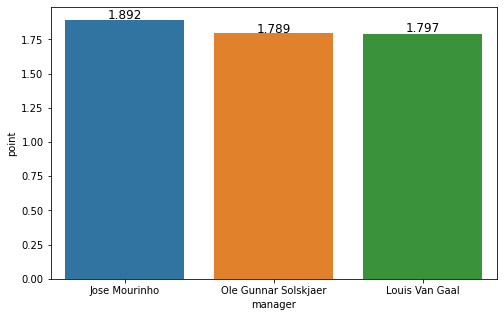

In [77]:
result = matches_df.groupby(["manager"])['point'].aggregate(np.mean).reset_index().sort_values('point',ascending = False)
fig,ax1 =plt.subplots(figsize=[8,5])
plot = sns.barplot(x='manager',y='point',data=matches_df,order = result['manager'],ci=None,ax=ax1)
for index, row in result.iterrows():
    plot.text(row.name,row.point+0.01, round(row.point,3), color='black', ha="center",fontsize = 12)
plt.show()    

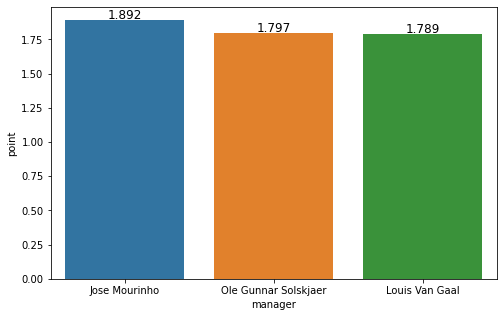

In [78]:
result = matches_df.groupby(["manager"])['point'].aggregate(np.mean).reset_index().sort_values('point',ascending = False).reset_index(drop = True)
fig,ax1 =plt.subplots(figsize=[8,5])
plot = sns.barplot(x='manager',y='point',data=matches_df,order = result['manager'],ci=None,ax=ax1)
for index, row in result.iterrows():
    plot.text(row.name,row.point+0.01, round(row.point,3), color='black', ha="center",fontsize = 12)
plt.show()    

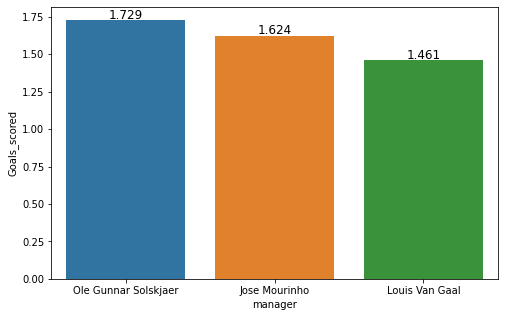

In [79]:
result2 = matches_df.groupby(["manager"])['Goals_scored'].aggregate(np.mean).reset_index().sort_values('Goals_scored',ascending = False).reset_index(drop=True)
fig,ax2 =plt.subplots(figsize=[8,5])
plot2 = sns.barplot(x='manager',y='Goals_scored',data=matches_df,order = result2['manager'],ci=None,ax=ax2)
for index, row in result2.iterrows():
    plot2.text(row.name,row.Goals_scored+0.01, round(row.Goals_scored,3), color='black', ha="center",fontsize = 12)
plt.show()    

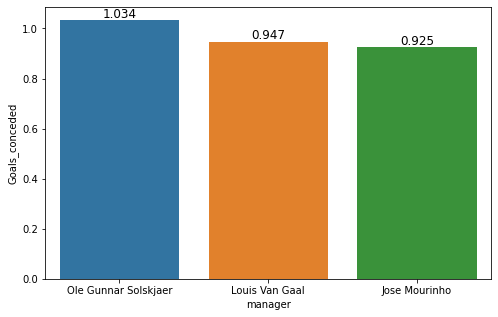

In [80]:
result3 = matches_df.groupby(["manager"])['Goals_conceded'].aggregate(np.mean).reset_index().sort_values('Goals_conceded',ascending = False).reset_index(drop=True)
fig,ax3 =plt.subplots(figsize=[8,5])
plot3 = sns.barplot(x='manager',y='Goals_conceded',data=matches_df,order = result3['manager'],ci=None,ax=ax3)
for index, row in result3.iterrows():
    plot3.text(row.name,row.Goals_conceded+0.01, round(row.Goals_conceded,3), color='black', ha="center",fontsize = 12)
plt.show()    

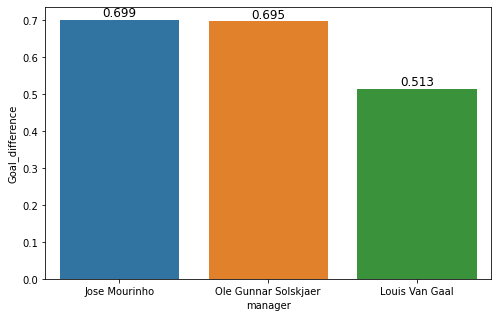

In [81]:
result4 = matches_df.groupby(["manager"])['Goal_difference'].aggregate(np.mean).reset_index().sort_values('Goal_difference',ascending = False).reset_index(drop=True)
fig,ax4 =plt.subplots(figsize=[8,5])
plot4 = sns.barplot(x='manager',y='Goal_difference',data=matches_df,order = result4['manager'],ci=None,ax=ax4)
for index, row in result4.iterrows():
    plot4.text(row.name,row.Goal_difference+0.01, round(row.Goal_difference,3), color='black', ha="center",fontsize = 12)
plt.show()  

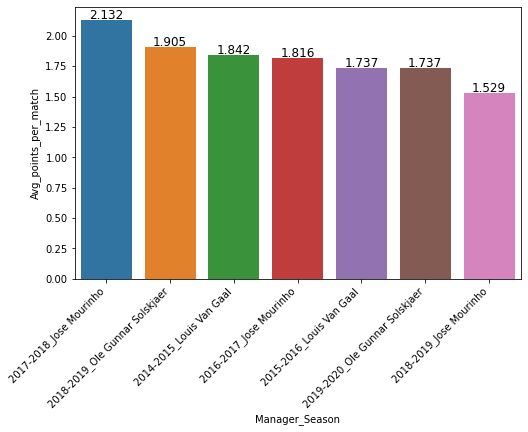

In [139]:
result5 =matches_df.groupby(['Season','manager']).agg({'point':'mean'}).reset_index().sort_values('point',ascending = False).reset_index(drop = True)
result5['Manager_Season'] = result5.Season + '_' + result5.manager
fig,ax5 =plt.subplots(figsize=[8,5])
plot5 = sns.barplot(x='Manager_Season',y='point',data=result5)
plt.ylabel('Avg_points_per_match')
ax5.set_xticklabels(result5.Manager_Season, rotation = 45, ha="right")
for index, row in result5.iterrows():
    plot5.text(row.name,row.point+0.01, round(row.point,3), color='black', ha="center",fontsize = 12)
plt.show()  


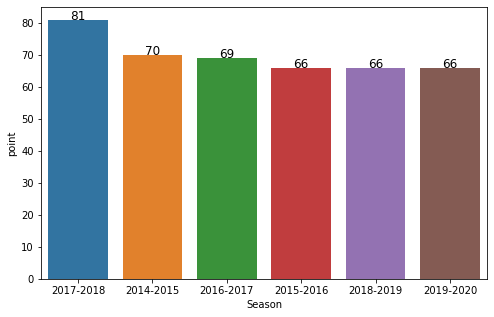

In [125]:
result5 = matches_df.groupby(["Season"])['point'].aggregate(sum).reset_index().sort_values('point',ascending = False).reset_index(drop = True)
fig,ax5 =plt.subplots(figsize=[8,5])
plot5 = sns.barplot(x='Season',y='point',data=matches_df,order = result5['Season'],estimator = sum,ci=None,ax=ax5,palette='tab10')
for index, row in result5.iterrows():
    plot5.text(row.name,row.point+0.01, round(row.point,3), color='black', ha="center",fontsize = 12)
plt.show()   

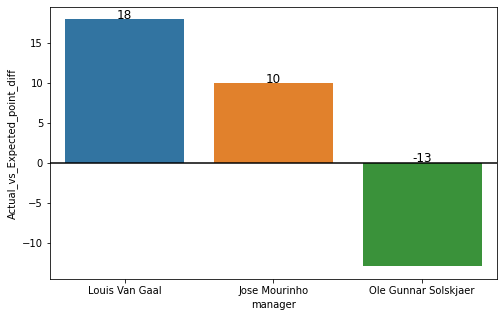

In [83]:
result6 = matches_df.groupby(["manager"])['Actual_vs_Expected_point_diff'].aggregate(sum).reset_index().sort_values('Actual_vs_Expected_point_diff',ascending = False).reset_index(drop = True)
fig,ax6 =plt.subplots(figsize=[8,5])
ax6 = plt.gca()
plt.axhline(y= 0,color ='k')
plot6 = sns.barplot(x='manager',y='Actual_vs_Expected_point_diff',data=matches_df,order = result6['manager'],estimator = sum,ci=None,ax=ax6)
for index, row in result6.iterrows():
    plot6.text(row.name,max(row.Actual_vs_Expected_point_diff,0)+0.1, round(row.Actual_vs_Expected_point_diff,3), color='black', ha="center",fontsize = 12)
plt.show()  

In [84]:
matches_df.head()

,datetime,forecast_d,forecast_l,forecast_w,id,isResult,result,side,opp,XG_team,XG_opp,Goals_scored,Goals_conceded,opp_id,manager,Season,Expected_result,team_XG_diff,opp_XG_diff,point,Actual_vs_Expected_point_diff,Actual_vs_Expected_goals_scored_diff,Actual_vs_Expected_goals_conceded_diff,Goal_difference,is_top6
0,2014-08-16 12:45:00,0.318817,0.087950,0.593233,4749,True,l,h,Swansea,1.166350,0.278076,1,2,84,Louis Van Gaal,2014-2015,Win,-0.166350,1.721924,0,-3,-0.166350,1.721924,-1,No
1,2014-08-24 16:00:00,0.347109,0.404688,0.248203,4767,True,d,a,Sunderland,0.941557,0.666489,1,1,77,Louis Van Gaal,2014-2015,Draw,0.058443,0.333511,1,0,0.058443,0.333511,0,No
2,2014-08-30 12:45:00,0.470480,0.249019,0.280501,4769,True,d,a,Burnley,0.467281,0.513746,0,0,92,Louis Van Gaal,2014-2015,Draw,-0.467281,-0.513746,1,0,-0.467281,-0.513746,0,No
3,2014-09-14 16:00:00,0.168136,0.079826,0.752038,4727,True,w,h,Queens Park Rangers,2.209110,0.563524,4,0,202,Louis Van Gaal,2014-2015,Win,1.790890,-0.563524,3,0,1.790890,-0.563524,4,No
4,2014-09-21 13:30:00,0.186411,0.254403,0.559186,4736,True,l,a,Leicester,1.711910,2.542200,3,5,75,Louis Van Gaal,2014-2015,Loss,1.288090,2.457800,0,0,1.288090,2.457800,-2,No


In [85]:
players_df_united

,datetime,forecast_d,forecast_l,forecast_w,id_x,isResult,result,side,opp,XG_team,XG_opp,Goals_scored,Goals_conceded,opp_id,manager,Season,Expected_result,team_XG_diff,opp_XG_diff,point,Actual_vs_Expected_point_diff,Actual_vs_Expected_goals_scored_diff,Actual_vs_Expected_goals_conceded_diff,Goal_difference,is_top6,assists,goals,h_a,id_y,key_passes,own_goals,player,player_id,position,positionOrder,red_card,roster_in,roster_out,shots,team_id,time,xA,xG,xGBuildup,xGChain,yellow_card,match_id,team_name
0,2014-08-16 12:45:00,0.318817,0.08795,0.593233,4749,True,l,h,Swansea,1.16635,0.278076,1,2,84,Louis Van Gaal,2014-2015,Win,-0.16635,1.721924,0,-3,-0.16635,1.721924,-1,No,0,0,h,17133,0,0,David de Gea,546,GK,1,0,0,0,0,89,90,0.000000,0.000000,0.000000,0.000000,0,4749,Manchester United
1,2014-08-16 12:45:00,0.318817,0.08795,0.593233,4749,True,l,h,Swansea,1.16635,0.278076,1,2,84,Louis Van Gaal,2014-2015,Win,-0.16635,1.721924,0,-3,-0.16635,1.721924,-1,No,0,0,h,17136,0,0,Chris Smalling,628,DC,3,0,0,0,1,89,90,0.000000,0.103211,0.071270,0.174481,0,4749,Manchester United
2,2014-08-16 12:45:00,0.318817,0.08795,0.593233,4749,True,l,h,Swansea,1.16635,0.278076,1,2,84,Louis Van Gaal,2014-2015,Win,-0.16635,1.721924,0,-3,-0.16635,1.721924,-1,No,0,0,h,17134,1,0,Phil Jones,951,DC,3,0,0,0,1,89,90,0.052529,0.069479,0.149839,0.149839,0,4749,Manchester United
3,2014-08-16 12:45:00,0.318817,0.08795,0.593233,4749,True,l,h,Swansea,1.16635,0.278076,1,2,84,Louis Van Gaal,2014-2015,Win,-0.16635,1.721924,0,-3,-0.16635,1.721924,-1,No,0,0,h,17135,0,0,Tyler Blackett,4463,DC,3,0,0,0,0,89,90,0.000000,0.000000,0.074857,0.074857,1,4749,Manchester United
4,2014-08-16 12:45:00,0.318817,0.08795,0.593233,4749,True,l,h,Swansea,1.16635,0.278076,1,2,84,Louis Van Gaal,2014-2015,Win,-0.16635,1.721924,0,-3,-0.16635,1.721924,-1,No,0,0,h,17137,0,0,Jesse Lingard,558,MR,8,0,17145,0,0,89,23,0.000000,0.000000,0.018741,0.018741,0,4749,Manchester United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6313,2020-07-26 15:00:00,0.273508,0.52604,0.200452,12018,True,w,a,Leicester,1.41019,0.754668,2,0,75,Ole Gunnar Solskjaer,2019-2020,Win,0.58981,-0.754668,3,0,0.58981,-0.754668,2,Yes,0,0,a,411497,0,0,Anthony Martial,553,FW,15,0,411499,0,1,89,90,0.000000,0.085085,0.000000,0.085085,0,12018,Manchester United
6314,2020-07-26 15:00:00,0.273508,0.52604,0.200452,12018,True,w,a,Leicester,1.41019,0.754668,2,0,75,Ole Gunnar Solskjaer,2019-2020,Win,0.58981,-0.754668,3,0,0.58981,-0.754668,2,Yes,0,0,a,411499,0,0,Odion Ighalo,573,Sub,17,0,0,411497,0,89,1,0.000000,0.000000,0.000000,0.000000,0,12018,Manchester United
6315,2020-07-26 15:00:00,0.273508,0.52604,0.200452,12018,True,w,a,Leicester,1.41019,0.754668,2,0,75,Ole Gunnar Solskjaer,2019-2020,Win,0.58981,-0.754668,3,0,0.58981,-0.754668,2,Yes,0,1,a,411500,0,0,Jesse Lingard,558,Sub,17,0,0,411494,1,89,10,0.000000,0.352077,0.000000,0.352077,0,12018,Manchester United
6316,2020-07-26 15:00:00,0.273508,0.52604,0.200452,12018,True,w,a,Leicester,1.41019,0.754668,2,0,75,Ole Gunnar Solskjaer,2019-2020,Win,0.58981,-0.754668,3,0,0.58981,-0.754668,2,Yes,0,0,a,411498,0,0,Timothy Fosu-Mensah,549,Sub,17,0,0,411496,0,89,1,0.000000,0.000000,0.000000,0.000000,0,12018,Manchester United
